In [ ]:
#Drive mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Install & Import Libraries

import os
import pandas as pd
import numpy as np

import pandas as pd
!pip uninstall keras
!pip install tensorflow transformers==4.36.0 ktrain


!pip install ktrain
import ktrain
from ktrain import text

import tensorflow as tf
from tensorflow import keras


os.environ['TF_USE_LEGACY_KERAS'] = '1'

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.15.0
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.1 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.1 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.1 which is incompatible.


/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:

#Set environment & define directories

ROOT_DIR = "/content/drive/MyDrive/Text_marketing"
DATA_DIR = "%s" % ROOT_DIR
EVAL_DIR = "%s/evaluation" % ROOT_DIR
MODEL_DIR = "%s/models" % ROOT_DIR


In [ ]:
#Reading data

reviews = pd.read_json('%s/training_data.json' % DATA_DIR)

In [ ]:
# View Dataframe Summary
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 10.7+ MB


In [ ]:
#Preview dataset rows

reviews.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
#Prepare combined text firelds
reviews['combined_text'] = reviews['headline'] + ' ' + reviews['short_description']

In [ ]:
 # Extract articles by category
reviews[reviews['category'].str.contains("HEALTHY LIVING|WELLNESS")]

,category,headline,authors,link,short_description,date,combined_text
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...
...,...,...,...,...,...,...,...
200797,WELLNESS,Shoveling Snow? How to Protect Your Back (And ...,,https://www.huffingtonpost.com/entry/shovel-sn...,"Work up to it. Warm up inside, and incorporate...",2012-01-28,Shoveling Snow? How to Protect Your Back (And ...
200799,WELLNESS,7 Reasons Working Too Much Is Bad For Your Health,Sarah Klein,https://www.huffingtonpost.com/entry/overtime-...,"If you're the last one to leave the office, or...",2012-01-28,7 Reasons Working Too Much Is Bad For Your Hea...
200800,WELLNESS,The Sleep Library: 11 Soothing Books For Bedtime,,https://www.huffingtonpost.comhttp://www.oprah...,Do you toss and turn until you finally sit up ...,2012-01-28,The Sleep Library: 11 Soothing Books For Bedti...
200802,WELLNESS,The Benefits of Caring for a Pet,"Rita Altman, R.N., Contributor\nSenior Vice Pr...",https://www.huffingtonpost.com/entry/pets-seni...,"For the young as well as the old, especially i...",2012-01-28,The Benefits of Caring for a Pet For the young...


In [ ]:
# Label data for binary classification
reviews['healthy_wellness'] = np.where((reviews['category'] == 'HEALTHY LIVING') | (reviews['category'] == 'WELLNESS'), 1, 0)

In [ ]:
# Verify health & wellness filtering
reviews[reviews['category'].str.contains("HEALTHY LIVING|WELLNESS")]


,category,headline,authors,link,short_description,date,combined_text,healthy_wellness
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...,1
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...,1
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...,1
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...,1
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...,1
...,...,...,...,...,...,...,...,...
200797,WELLNESS,Shoveling Snow? How to Protect Your Back (And ...,,https://www.huffingtonpost.com/entry/shovel-sn...,"Work up to it. Warm up inside, and incorporate...",2012-01-28,Shoveling Snow? How to Protect Your Back (And ...,1
200799,WELLNESS,7 Reasons Working Too Much Is Bad For Your Health,Sarah Klein,https://www.huffingtonpost.com/entry/overtime-...,"If you're the last one to leave the office, or...",2012-01-28,7 Reasons Working Too Much Is Bad For Your Hea...,1
200800,WELLNESS,The Sleep Library: 11 Soothing Books For Bedtime,,https://www.huffingtonpost.comhttp://www.oprah...,Do you toss and turn until you finally sit up ...,2012-01-28,The Sleep Library: 11 Soothing Books For Bedti...,1
200802,WELLNESS,The Benefits of Caring for a Pet,"Rita Altman, R.N., Contributor\nSenior Vice Pr...",https://www.huffingtonpost.com/entry/pets-seni...,"For the young as well as the old, especially i...",2012-01-28,The Benefits of Caring for a Pet For the young...,1


In [ ]:
# Preview health & wellness filtering
reviews['healthy_wellness'].describe()


,healthy_wellness
count,200853.000000
mean,0.122084
std,0.327384
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Balance the datasheet
sample_amount = 20000
healthy_wellness = reviews[reviews['healthy_wellness'] == 1]
not_healthy_wellness = reviews[reviews['healthy_wellness'] == 0].sample(n = sample_amount, random_state = 1)



In [ ]:
review_sample = pd.concat([healthy_wellness, not_healthy_wellness])

In [ ]:
review_sample

,category,headline,authors,link,short_description,date,combined_text,healthy_wellness
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...,1
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...,1
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...,1
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...,1
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...,1
...,...,...,...,...,...,...,...,...
94010,BUSINESS,Sankalp Q&A: Unitus Seeks to Launch Seed Funds...,"David Bank, ContributorEditor, ImpactAlpha.com",https://www.huffingtonpost.com/entry/sankalp-r...,Most of the thousands of investors and entrepr...,2015-04-10,Sankalp Q&A: Unitus Seeks to Launch Seed Funds...,0
68287,ENTERTAINMENT,'The Birth Of A Nation' Is The Year's Powerful...,Matthew Jacobs,https://www.huffingtonpost.com/entry/the-birth...,Nate Parker's story of an 1831 slave rebellion...,2016-01-27,'The Birth Of A Nation' Is The Year's Powerful...,0
190134,FOOD & DRINK,Turmeric: How Do You Pronounce It?,"Kitchen Daily, Kitchen Daily",https://www.huffingtonpost.com/entry/turmeric-...,Turmeric is one of those words that many peopl...,2012-05-22,Turmeric: How Do You Pronounce It? Turmeric is...,0
99043,BUSINESS,Enjoy the Cheap Gas... But Don't Expect it to ...,"James Dondero, ContributorHedge fund manager a...",https://www.huffingtonpost.com/entry/enjoy-the...,Don't get too used to it. Unless I'm terribly ...,2015-02-10,Enjoy the Cheap Gas... But Don't Expect it to ...,0


In [ ]:
# Split dataset & preprocess text
from sklearn.model_selection import train_test_split
from ktrain import text
from ktrain.text import texts_from_df


train, val, preprocess = texts_from_df(
    review_sample, 'combined_text',
    label_columns=['healthy_wellness'],
    val_pct=0.1,
    maxlen=32,
    max_features=7000,
    ngram_range=1,
    preprocess_mode='standard',
    verbose=1,
    random_state=1
    )


['not_healthy_wellness', 'healthy_wellness']
        not_healthy_wellness  healthy_wellness
110937                   0.0               1.0
146745                   0.0               1.0
189522                   0.0               1.0
54121                    1.0               0.0
115321                   1.0               0.0
['not_healthy_wellness', 'healthy_wellness']
        not_healthy_wellness  healthy_wellness
161607                   0.0               1.0
140824                   0.0               1.0
148111                   1.0               0.0
167749                   1.0               0.0
183440                   0.0               1.0
language: en
Word Counts: 49685
Nrows: 40068
40068 train sequences
train sequence lengths:
	mean : 30
	95percentile : 55
	99percentile : 65
x_train shape: (40068,32)
y_train shape: (40068, 2)
Is Multi-Label? False
4453 test sequences
test sequence lengths:
	mean : 30
	95percentile : 55
	99percentile : 64
x_test shape: (4453,32)
y_test shape: (4

In [ ]:
# Build model & learner
model = text.text_classifier('fasttext', train_data=train, preproc=preprocess)
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)

Is Multi-Label? False
compiling word ID features...
maxlen is 32
done.


In [ ]:
# Find learning rate
learner.lr_find(max_epochs=6)


simulating training for different learning rates... this may take a few moments...
Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1253/1253 [==============================] - 8s 6ms/step - loss: 0.9107 - accuracy: 0.4989
Epoch 2/6
1253/1253 [==============================] - 7s 6ms/step - loss: 0.8864 - accuracy: 0.5072
Epoch 3/6
1253/1253 [==============================] - 7s 6ms/step - loss: 0.7029 - accuracy: 0.6071
Epoch 4/6
1253/1253 [==============================] - 7s 6ms/step - loss: 0.4460 - accuracy: 0.7985
Epoch 5/6
1253/1253 [==============================] - 7s 6ms/step - loss: 0.6333 - accuracy: 0.6178
Epoch 6/6
1253/1253 [==============================] - 7s 6ms/step - loss: 0.8214 - accuracy: 0.5135


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


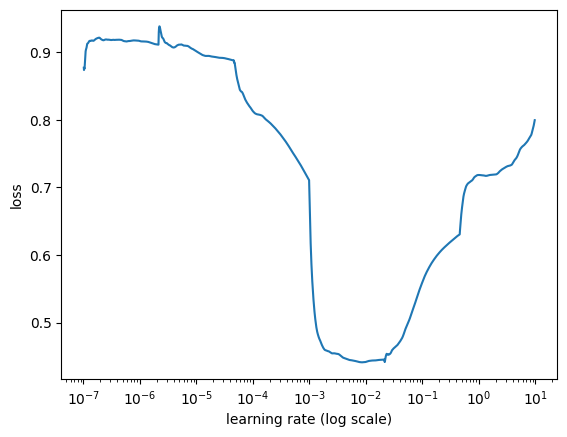

In [ ]:
learner.lr_plot()


In [ ]:
# Train the model
history = learner.autofit(1e-4, checkpoint_folder = 'checkpoint', epochs = 16, early_stopping = True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/16
1253/1253 [==============================] - 9s 6ms/step - loss: 0.8198 - accuracy: 0.5338 - val_loss: 0.6209 - val_accuracy: 0.7550
Epoch 2/16
1253/1253 [==============================] - 8s 7ms/step - loss: 0.7066 - accuracy: 0.5947 - val_loss: 0.5634 - val_accuracy: 0.7916
Epoch 3/16
1253/1253 [==============================] - 8s 7ms/step - loss: 0.6235 - accuracy: 0.6618 - val_loss: 0.5002 - val_accuracy: 0.8136
Epoch 4/16
1253/1253 [==============================] - 8s 6ms/step - loss: 0.5598 - accuracy: 0.7129 - val_loss: 0.4467 - val_accuracy: 0.8293
Epoch 5/16
1253/1253 [==============================] - 8s 7ms/step - loss: 0.5027 - accuracy: 0.7547 - val_loss: 0.4030 - val_accuracy: 0.8417
Epoch 6/16
1253/1253 [==============================] - 8s 6ms/step - loss: 0.4672 - accuracy: 0.7807 - val_loss: 0.3739 - val_accuracy: 0.8543
Epoch 7/16
1253/1253 [==============================] - 

In [ ]:
# Save model
learner.save_model("%s/distilbertmodel_learner" % DATA_DIR)


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Create predictor & save
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)
predictor.save("%s/distilbertmodel_predictor")

In [ ]:
#Test Documents used in Lecture

test_docs = [
'Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.',
'Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.',
'What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.',
'Why We All Need to Have More Fun. Prioritizing fun may feel impossible right now. But this four-step plan will help you rediscover how to feel more alive.',
'Cuomo Will Not Be Prosecuted in Groping Case, Albany D.A. Says. The district attorney described the woman who said former Gov. Andrew Cuomo had groped her as “credible,” but added that proving her allegation would be difficult.',
'A Film Captures Jewish Life in a Polish Town Before the Nazis Arrived. A documentary based on a home movie shot by an American in 1938 provides a look at the vibrancy of a Jewish community in Europe just before the Holocaust.'
             ]

In [ ]:
for i, text in enumerate(test_docs):
  probs = predictor.predict(text, return_proba = True)
  print("---------------------------")
  print('The probability this is health or wellness is %s' % probs[1])
  print(text)

---------------------------
The probability this is health or wellness is 0.99371356
Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.
---------------------------
The probability this is health or wellness is 0.9633632
Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.
---------------------------
The probability this is health or wellness is 0.8903795
What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.
---------------------------
The probability this is health or wellness is 0.7179262
Why We All Need to Have More Fun. Prioritizing fun may feel impossible right now. But this four-step plan will help you rediscover how to feel more alive.
---------------------------
The probability this is health or wellness is 0.013981443
Cuomo Will Not

In [ ]:
validation = learner.validate(val_data=val, print_report=True)

140/140 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2033
           1       0.88      0.90      0.89      2420

    accuracy                           0.88      4453
   macro avg       0.88      0.88      0.88      4453
weighted avg       0.88      0.88      0.88      4453

